In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
claim_info_df = pd.read_excel('/content/Claim Information file for UNT.xlsx')
option_code_df = pd.read_excel('/content/Option Code Information file for UNT - Final.xlsx')

# Rename columns for consistency
option_code_df = option_code_df.rename(columns={'Truck': 'Truck Number'})

# Merge the datasets on 'Truck Number'
merged_df = pd.merge(claim_info_df, option_code_df, on="Truck Number", how="inner")

# Encode categorical variables
encoded_df = merged_df.copy()
attribute_columns = [col for col in merged_df.columns if 'Attribute' in col]
for col in attribute_columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Encode 'Scale Claim Cost' and 'Scale Labor Cost' as ordinal scales
encoded_df['Scale Claim Cost'] = LabelEncoder().fit_transform(encoded_df['Scale Claim Cost'])
encoded_df['Scale Labor Cost'] = LabelEncoder().fit_transform(encoded_df['Scale Labor Cost'])

# Proceed with your analysis (correlation, interaction analysis, modeling, etc.)


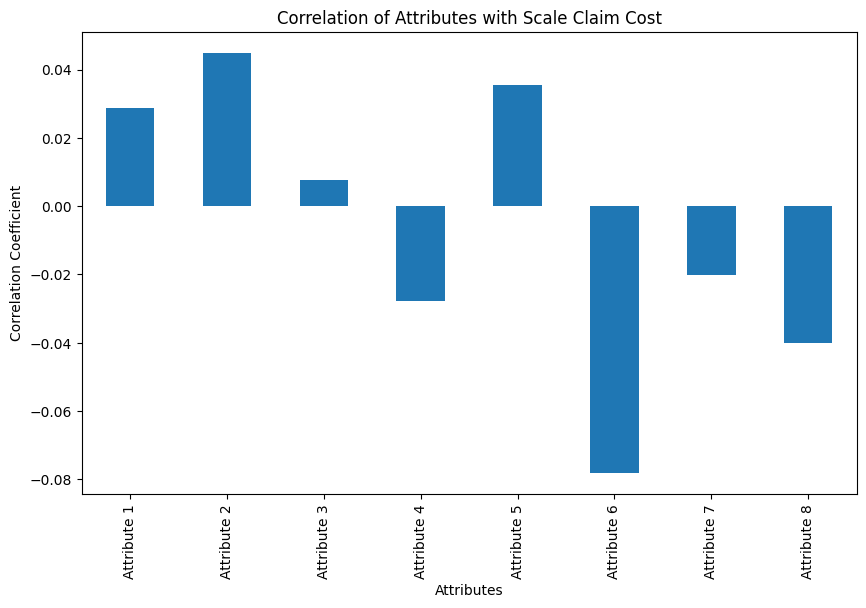

In [ ]:
# Ensure we only select numeric columns for the correlation matrix
numeric_encoded_df = encoded_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_encoded_df.corr()

# Extract correlations of attributes with 'Scale Claim Cost'
claim_cost_corr = correlation_matrix['Scale Claim Cost'].drop(['Scale Claim Cost', 'Scale Labor Cost'], errors='ignore')

# Plot correlations to visualize attribute impact on warranty costs
plt.figure(figsize=(10, 6))
claim_cost_corr.plot(kind='bar')
plt.title("Correlation of Attributes with Scale Claim Cost")
plt.xlabel("Attributes")
plt.ylabel("Correlation Coefficient")
plt.show()


In [ ]:
# Analyze interaction effects of attribute pairs on warranty costs
interaction_corrs = {}
for attr1, attr2 in itertools.combinations(attribute_columns, 2):
    interaction_term = encoded_df[attr1] * encoded_df[attr2]
    interaction_corr = np.corrcoef(interaction_term, encoded_df['Scale Claim Cost'])[0, 1]
    interaction_corrs[(attr1, attr2)] = interaction_corr

# Identify top 10 pairs with highest absolute correlation to warranty costs
top_interactions = sorted(interaction_corrs.items(), key=lambda x: abs(x[1]), reverse=True)[:10]
print("Top attribute interactions correlated with warranty costs:")
for (attr1, attr2), corr in top_interactions:
    print(f"{attr1} and {attr2}: Correlation = {corr:.4f}")


Top attribute interactions correlated with warranty costs:
Attribute 6 and Attribute 7: Correlation = -0.0791
Attribute 6 and Attribute 8: Correlation = -0.0780
Attribute 2 and Attribute 5: Correlation = 0.0779
Attribute 4 and Attribute 6: Correlation = -0.0607
Attribute 1 and Attribute 6: Correlation = -0.0589
Attribute 1 and Attribute 2: Correlation = 0.0558
Attribute 1 and Attribute 5: Correlation = 0.0504
Attribute 3 and Attribute 6: Correlation = -0.0488
Attribute 3 and Attribute 5: Correlation = 0.0460
Attribute 2 and Attribute 3: Correlation = 0.0443


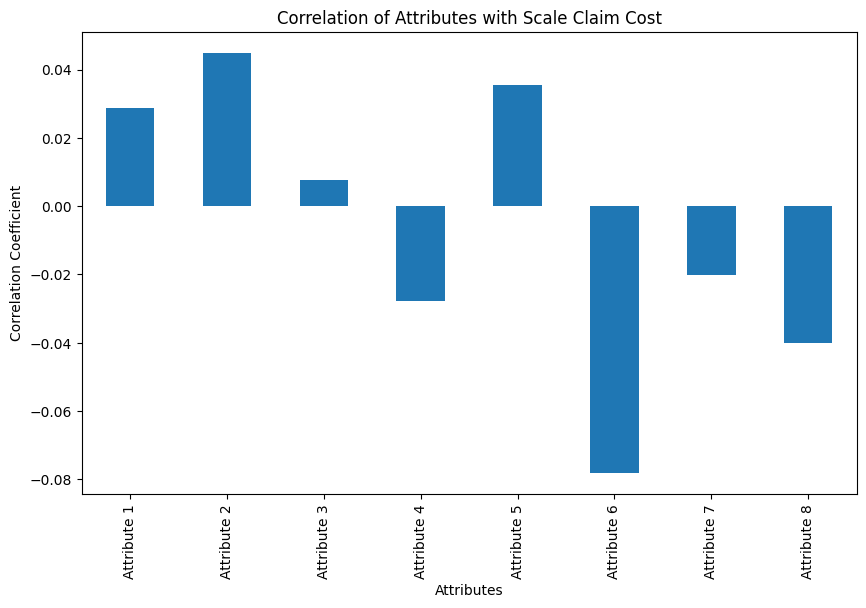

Top 5 attribute interactions impacting warranty costs (Enduring Craftsmanship):
Attribute 6 and Attribute 7: Correlation = -0.0791
Attribute 6 and Attribute 8: Correlation = -0.0780
Attribute 2 and Attribute 5: Correlation = 0.0779
Attribute 4 and Attribute 6: Correlation = -0.0607
Attribute 1 and Attribute 6: Correlation = -0.0589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Model RMSE on test data: 1.0105


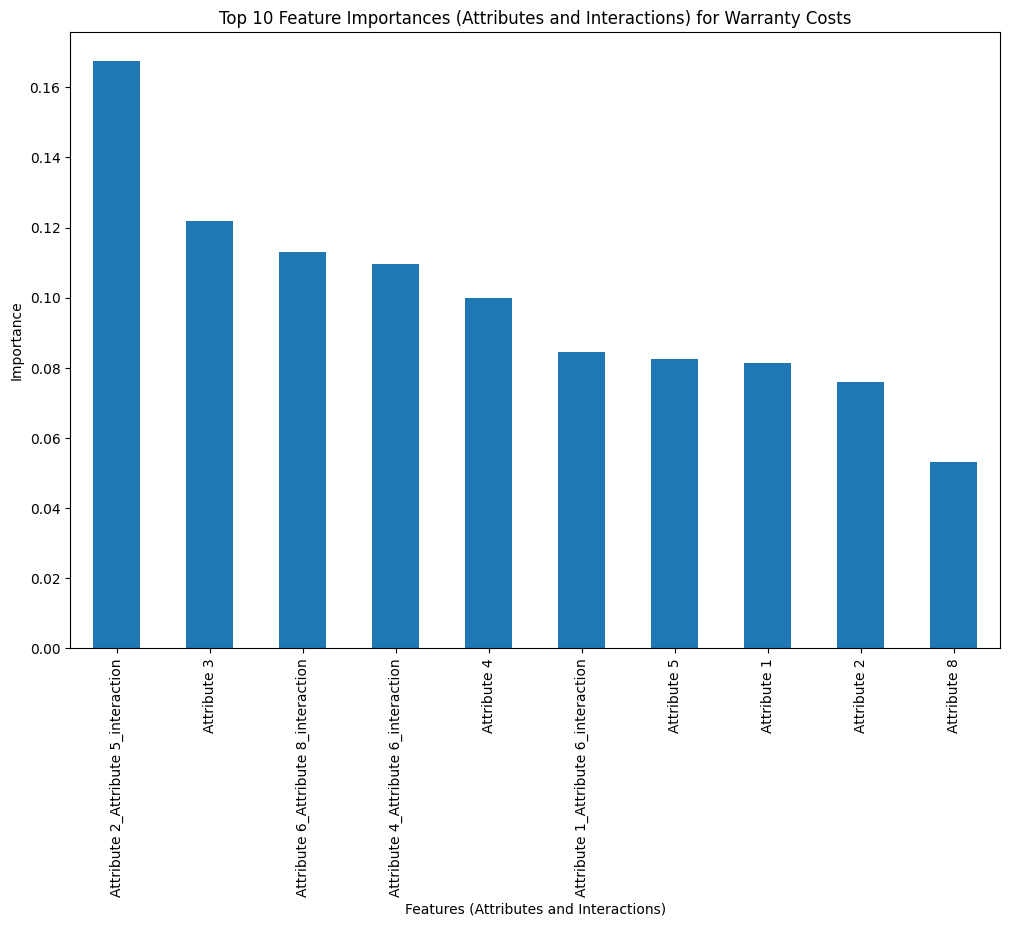


Recommendations to Align with Peterbilt's Business Model:
1. Purposeful Innovation: Focus on high-impact attributes to minimize warranty costs and enhance durability.
2. Enduring Craftsmanship: Avoid high-risk attribute combinations to maintain product quality and reliability.
3. Individualized Solutions: Use predictive insights to recommend customized configurations with lower warranty costs.
4. Pride and Class: Prioritize configurations identified as low-risk by the model to uphold Peterbilt's legacy of quality.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets (update paths as needed)
claim_info_df = pd.read_excel('/content/Claim Information file for UNT.xlsx')
option_code_df = pd.read_excel('/content/Option Code Information file for UNT - Final.xlsx')

# Rename columns for consistency
option_code_df = option_code_df.rename(columns={'Truck': 'Truck Number'})

# Merge datasets on 'Truck Number'
merged_df = pd.merge(claim_info_df, option_code_df, on="Truck Number", how="inner")

# Encode categorical variables
encoded_df = merged_df.copy()
attribute_columns = [col for col in merged_df.columns if 'Attribute' in col]
for col in attribute_columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Encode 'Scale Claim Cost' and 'Scale Labor Cost' as ordinal scales
encoded_df['Scale Claim Cost'] = LabelEncoder().fit_transform(encoded_df['Scale Claim Cost'])
encoded_df['Scale Labor Cost'] = LabelEncoder().fit_transform(encoded_df['Scale Labor Cost'])

# 1. Purposeful Innovation: Identify high-impact attributes with correlation and feature importance analysis
numeric_encoded_df = encoded_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_encoded_df.corr()
claim_cost_corr = correlation_matrix['Scale Claim Cost'].drop(['Scale Claim Cost', 'Scale Labor Cost'], errors='ignore')

# Plot correlations to highlight high-impact attributes
plt.figure(figsize=(10, 6))
claim_cost_corr.plot(kind='bar')
plt.title("Correlation of Attributes with Scale Claim Cost")
plt.xlabel("Attributes")
plt.ylabel("Correlation Coefficient")
plt.show()

# 2. Enduring Craftsmanship: Pairwise interaction analysis to ensure quality and avoid high-risk combinations
interaction_corrs = {}
for attr1, attr2 in itertools.combinations(attribute_columns, 2):
    interaction_term = encoded_df[attr1] * encoded_df[attr2]
    interaction_corr = np.corrcoef(interaction_term, encoded_df['Scale Claim Cost'])[0, 1]
    interaction_corrs[(attr1, attr2)] = interaction_corr

# Identify top 5 impactful interactions affecting warranty costs
top_5_interactions = sorted(interaction_corrs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
print("Top 5 attribute interactions impacting warranty costs (Enduring Craftsmanship):")
for (attr1, attr2), corr in top_5_interactions:
    print(f"{attr1} and {attr2}: Correlation = {corr:.4f}")

# 3. Individualized Solutions: Build a predictive model to customize solutions based on warranty cost predictions
# Define X (attributes and top interaction terms) and y (Scale Claim Cost)
X = encoded_df[attribute_columns].copy()
for attr1, attr2 in dict(top_5_interactions).keys():
    X[f"{attr1}_{attr2}_interaction"] = encoded_df[attr1] * encoded_df[attr2]
y = encoded_df['Scale Claim Cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model to predict warranty costs for configurations
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate model performance
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest Model RMSE on test data: {rmse:.4f}")

# 4. Pride and Class: Feature importance analysis to prioritize high-quality configurations
# Extract and display feature importances to identify key attributes and interactions
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances to highlight attributes and interactions crucial to warranty costs
plt.figure(figsize=(12, 8))
sorted_importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Attributes and Interactions) for Warranty Costs")
plt.xlabel("Features (Attributes and Interactions)")
plt.ylabel("Importance")
plt.show()

# Final Recommendations Based on Model Insights
print("\nRecommendations to Align with Peterbilt's Business Model:")
print("1. Purposeful Innovation: Focus on high-impact attributes to minimize warranty costs and enhance durability.")
print("2. Enduring Craftsmanship: Avoid high-risk attribute combinations to maintain product quality and reliability.")
print("3. Individualized Solutions: Use predictive insights to recommend customized configurations with lower warranty costs.")
print("4. Pride and Class: Prioritize configurations identified as low-risk by the model to uphold Peterbilt's legacy of quality.")


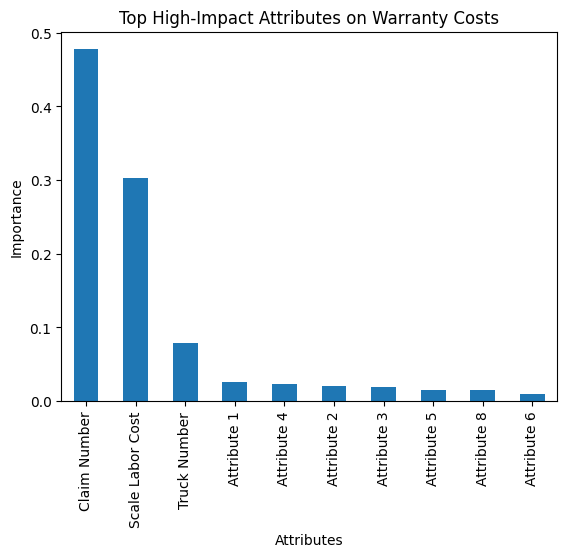

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `encoded_df` is the processed dataset
X = encoded_df.drop(columns=['Scale Claim Cost'])  # Features
y = encoded_df['Scale Claim Cost']  # Target

# Identify non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

# Plot top features
top_features.plot(kind='bar', title="Top High-Impact Attributes on Warranty Costs")
plt.xlabel("Attributes")
plt.ylabel("Importance")
plt.show()


In [ ]:
# Predicting warranty cost
predicted_warranty_cost = model.predict(X_test)

# Create a DataFrame to show predicted warranty costs and configurations
recommendation_df = X_test.copy()
recommendation_df['Predicted Warranty Cost'] = predicted_warranty_cost

# Define the threshold value for low-cost configurations
threshold_value = recommendation_df['Predicted Warranty Cost'].median()  # Use median as an example

# Select configurations with low predicted costs
recommended_configs = recommendation_df[recommendation_df['Predicted Warranty Cost'] < threshold_value]

# Display recommended low-risk configurations
recommended_configs.head()


,Truck Number,Claim Number,Scale Labor Cost,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Predicted Warranty Cost
122376,15699,24866,1,9,25,1,0,2,1,3,1,7,0.17
121957,31673,24400,1,10,32,11,2,30,1,8,1,8,0.26
121964,22125,24408,2,9,31,0,2,31,1,8,1,7,0.10
12181,28181,24247,1,10,24,2,9,33,1,8,1,8,0.69
121825,22541,24254,1,9,24,0,4,4,1,8,1,7,0.25


In [ ]:
import itertools
import numpy as np

# Identify high-risk attribute combinations
interaction_corrs = {}
for attr1, attr2 in itertools.combinations(attribute_columns, 2):
    interaction_term = encoded_df[attr1] * encoded_df[attr2]
    interaction_corr = np.corrcoef(interaction_term, encoded_df['Scale Claim Cost'])[0, 1]
    interaction_corrs[(attr1, attr2)] = interaction_corr

# Top high-risk attribute pairs
top_interactions = sorted(interaction_corrs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
print("Top high-risk attribute combinations:")
for (attr1, attr2), corr in top_interactions:
    print(f"{attr1} and {attr2}: Correlation = {corr:.4f}")


Top high-risk attribute combinations:
Attribute 6 and Attribute 7: Correlation = -0.0791
Attribute 6 and Attribute 8: Correlation = -0.0780
Attribute 2 and Attribute 5: Correlation = 0.0779
Attribute 4 and Attribute 6: Correlation = -0.0607
Attribute 1 and Attribute 6: Correlation = -0.0589


In [ ]:
# Define the low-risk threshold
low_risk_threshold = recommendation_df['Predicted Warranty Cost'].median()  # Use median as an example threshold

# Identify low-risk configurations based on predictions
low_risk_configs = recommendation_df[recommendation_df['Predicted Warranty Cost'] < low_risk_threshold]

# Mark configurations as premium
low_risk_configs['Configuration Type'] = 'Premium Choice'
low_risk_configs.head()  # Display premium configurations


<ipython-input-21-b0f4f6ffbca2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_risk_configs['Configuration Type'] = 'Premium Choice'


,Truck Number,Claim Number,Scale Labor Cost,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Predicted Warranty Cost,Configuration Type
122376,15699,24866,1,9,25,1,0,2,1,3,1,7,0.17,Premium Choice
121957,31673,24400,1,10,32,11,2,30,1,8,1,8,0.26,Premium Choice
121964,22125,24408,2,9,31,0,2,31,1,8,1,7,0.10,Premium Choice
12181,28181,24247,1,10,24,2,9,33,1,8,1,8,0.69,Premium Choice
121825,22541,24254,1,9,24,0,4,4,1,8,1,7,0.25,Premium Choice


5.

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Example: Create a time series of stock levels as 'inventory_data'
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")  # 100 days of data
stock_levels = np.random.randint(50, 150, size=len(dates))  # Random stock levels

# Creating a DataFrame and setting it up as a time series
inventory_data = pd.Series(stock_levels, index=dates)

# ARIMA model setup and forecasting
model = ARIMA(inventory_data, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # 30-day forecast

print("Inventory Forecast for Next 30 Days:")
print(forecast)


Inventory Forecast for Next 30 Days:
2023-04-11    102.428827
2023-04-12    106.197903
2023-04-13    105.892866
2023-04-14    105.917553
2023-04-15    105.915555
2023-04-16    105.915717
2023-04-17    105.915704
2023-04-18    105.915705
2023-04-19    105.915705
2023-04-20    105.915705
2023-04-21    105.915705
2023-04-22    105.915705
2023-04-23    105.915705
2023-04-24    105.915705
2023-04-25    105.915705
2023-04-26    105.915705
2023-04-27    105.915705
2023-04-28    105.915705
2023-04-29    105.915705
2023-04-30    105.915705
2023-05-01    105.915705
2023-05-02    105.915705
2023-05-03    105.915705
2023-05-04    105.915705
2023-05-05    105.915705
2023-05-06    105.915705
2023-05-07    105.915705
2023-05-08    105.915705
2023-05-09    105.915705
2023-05-10    105.915705
Freq: D, Name: predicted_mean, dtype: float64
